In [1]:
# 用faker库,构建一个数据集，如果没有，需要提前安装
import pandas as pd
from   faker import Faker
fake = Faker(locale='zh_CN')

df = pd.DataFrame({
    'userA':[str(fake.random_int(10000, 10012)) for i in range(0,12)],
    'userB':[str(fake.random_int(10000, 10020)) for i in range(0,12)],
    'time':[fake.date_time_between(start_date="-1d",end_date="now").strftime("%Y-%m-%d %H:%M:%S") for i in range(0,12)]
     })

# 查看我们生成的数据集，有时候结果不是很好用，可以多生成几次
df

,userA,userB,time
0,10010,10008,2024-01-07 09:21:22
1,10000,10016,2024-01-07 08:40:18
2,10008,10016,2024-01-07 12:47:31
3,10007,10013,2024-01-07 05:16:16
4,10002,10008,2024-01-07 08:00:21
5,10012,10004,2024-01-07 07:13:52
6,10003,10001,2024-01-07 20:54:28
7,10006,10016,2024-01-07 19:19:03
8,10005,10014,2024-01-07 08:52:56
9,10001,10005,2024-01-07 16:41:49


In [2]:
# 对数据进行聚合
df = df.groupby(['userA','userB']).agg({'time': pd.Series.nunique}).reset_index()
print('聚合数据:\n',df)

# 剔除自己指向自己的节点
df = df[df['userA']!=df['userB']]
print('剔除后的数据:\n',df)



聚合数据:
     userA  userB  time
0   10000  10016     1
1   10001  10000     1
2   10001  10005     1
3   10001  10020     1
4   10002  10008     1
5   10003  10001     1
6   10005  10014     1
7   10006  10016     1
8   10007  10013     1
9   10008  10016     1
10  10010  10008     1
11  10012  10004     1
剔除后的数据:
     userA  userB  time
0   10000  10016     1
1   10001  10000     1
2   10001  10005     1
3   10001  10020     1
4   10002  10008     1
5   10003  10001     1
6   10005  10014     1
7   10006  10016     1
8   10007  10013     1
9   10008  10016     1
10  10010  10008     1
11  10012  10004     1


In [3]:
# 可视化我们的数据集
import networkx as nx
import matplotlib.pyplot as plt

da = df[['userA','userB']].values
G  = nx.Graph()
for num in range(len(da)):
    G.add_edge(str(da[num,0]),str(da[num,1]))

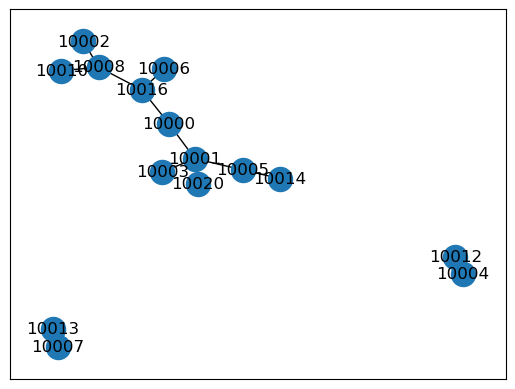

In [4]:
nx.draw_networkx(G)

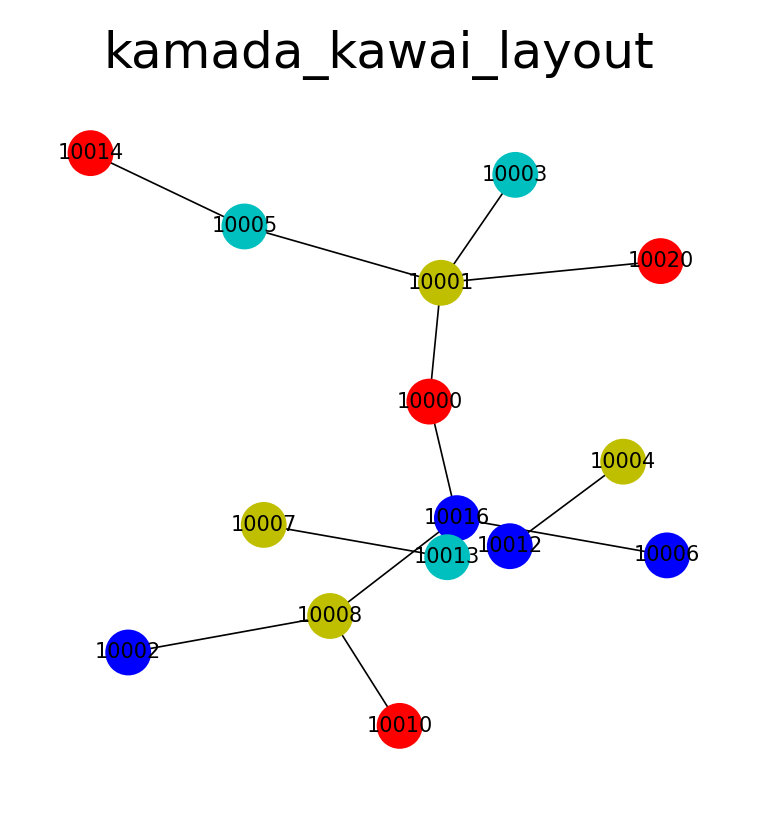

In [5]:
#显示该graph-kamada_kawai_layout 设置图片的大小，想要清晰的可以设置的大点
plt.figure(figsize=(3,3),dpi=300)

colors = ['r','b','y','c']*5
colors = colors[0:len(G.nodes())]

nx.draw_networkx(G,
                 pos = nx.kamada_kawai_layout(G),
                 node_color = colors,
                 node_size=100,
                 font_size=5,
                 width=0.4,
                 alpha=1
                 )
plt.title("kamada_kawai_layout")
plt.axis('off')
plt.show()

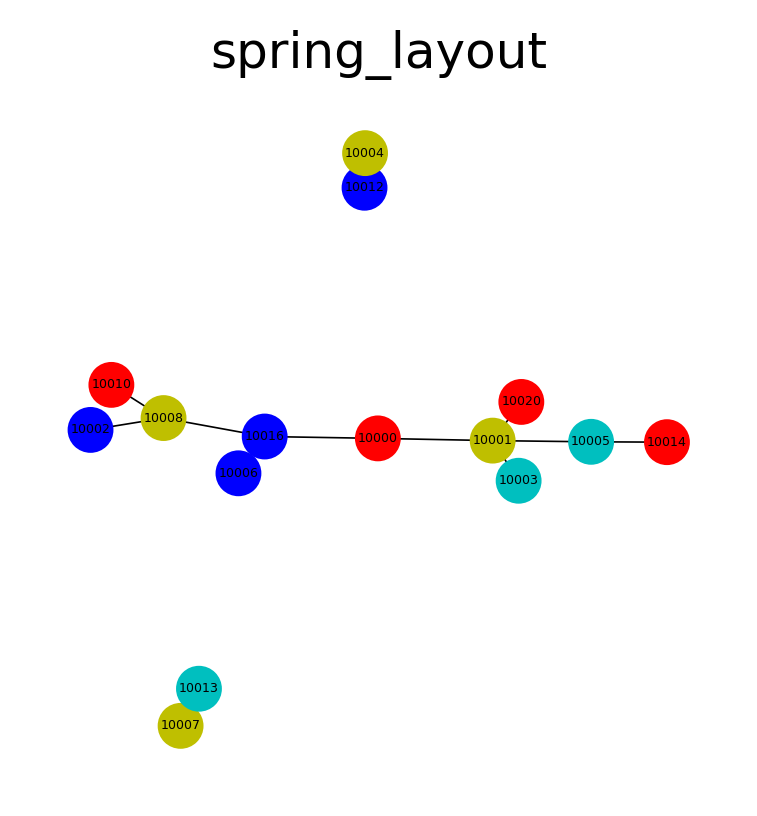

In [6]:



# 换个显示方式-使用spring_layout布局
colors = ['r','b','y','c']*6
colors = colors[0:len(G.nodes())]
plt.figure(figsize=(3,3),dpi=300)
nx.draw_networkx(G,
                 pos = nx.spring_layout(G),
                 node_color = colors,
                 node_size=100,
                 font_size=3,
                 width=0.4,
                 alpha=1
                 )
plt.axis('off')
plt.title("spring_layout")
plt.show()

In [7]:
com = list(nx.connected_components(G))

In [9]:
#打印分群的结果，可以看到结果为：列表-字典格式
print('直接分群结果:',com,'\n')


直接分群结果: [{'10000', '10016', '10001', '10006', '10003', '10008', '10020', '10010', '10014', '10005', '10002'}, {'10007', '10013'}, {'10012', '10004'}] 



In [10]:

# 将列表-字典格式 整理成Dataframe格式
df_com  = pd.DataFrame()
for i in range(0, len(com)):
    d = pd.DataFrame({'group_id': [i] * len(com[i]), 'user_id': list(com[i])})
    df_com = pd.concat([df_com,d])


In [11]:
df_com

,group_id,user_id
0,0,10000
1,0,10016
2,0,10001
3,0,10006
4,0,10003
5,0,10008
6,0,10020
7,0,10010
8,0,10014
9,0,10005


In [12]:
#查看整理后的结果
print('整理分群结果:\n',df_com)



# 统计每个群组人数
df_com.groupby('group_id').count().sort_values(by='user_id', ascending=False) 



整理分群结果:
     group_id user_id
0          0   10000
1          0   10016
2          0   10001
3          0   10006
4          0   10003
5          0   10008
6          0   10020
7          0   10010
8          0   10014
9          0   10005
10         0   10002
0          1   10007
1          1   10013
0          2   10012
1          2   10004


,user_id
group_id,
0,11
1,2
2,2
